In [5]:
# imports 
from sklearn.datasets import  make_moons
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
plt.style.use('ggplot')

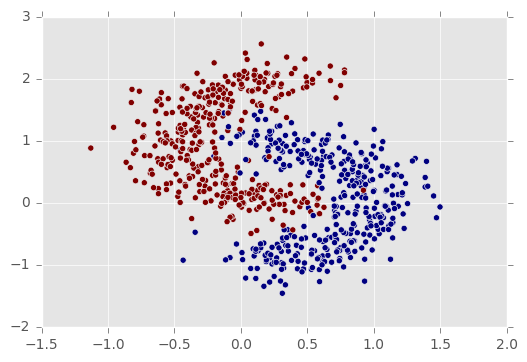

In [15]:
# create and plot dataset
XX, yy = make_moons(n_samples=750, random_state=42, noise=0.2)

x1 = [pt[0] for pt in XX]
x2 = [pt[1] for pt in XX]

plt.scatter(x2, x1, c=yy)
plt.show()

In [16]:
# adding features

data = pd.DataFrame(data=XX, columns=['x1', 'x2'])
labels = pd.DataFrame(data=yy, columns=['labels'])
data['x1_square'] = data['x1']**2
data['x2_square'] = data['x2']**2
data['x1_x2_product'] = data['x2']*data['x1']

In [17]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)


#Prepare data for NN
X_train, y_train = X_train.as_matrix(), y_train.as_matrix()
X_test, y_test = X_test.as_matrix(), y_test.as_matrix()

# each class needs one column
def one_encoded(X1):
    res = []
    for i in X1:
        res.append([i[0], -(i[0] - 1)])
    return res

y_train = np.array(one_encoded(y_train))
y_test = np.array(one_encoded(y_test))


In [18]:
# NN variables
training_epochs = 100
batch_size = 100
num_features = 5
display_step = 10
learning_rate = 0.003
label_dimension = 2

In [19]:
# input layer
X = tf.placeholder(tf.float32, [None, num_features])

# output_layer
y = tf.placeholder(tf.float32, [None, label_dimension])

# hidden layer 1
w_1 = tf.Variable(tf.random_normal([num_features, 6]))
b_1 = tf.Variable(tf.zeros([6]))
h_1 = tf.nn.relu(tf.matmul(X, w_1) + b_1)

# hidden layer 2
w_2 = tf.Variable(tf.random_normal([6, 6]))
b_2 = tf.Variable(tf.zeros([6]))
h_2 = tf.nn.tanh(tf.matmul(h_1, w_2) + b_2)

# hidden layer 3
w_3 = tf.Variable(tf.random_normal([6, 6]))
b_3 = tf.Variable(tf.zeros([6]))
h_3 = tf.nn.tanh(tf.matmul(h_2, w_3) + b_3)

# hidden layer 4
w_4 = tf.Variable(tf.random_normal([6, 6]))
b_4 = tf.Variable(tf.zeros([6]))
h_4 = tf.nn.tanh(tf.matmul(h_3, w_4) + b_4)

# hidden layer 5
w_5 = tf.Variable(tf.random_normal([6, 6]))
b_5 = tf.Variable(tf.zeros([6]))
h_5 = tf.nn.tanh(tf.matmul(h_4, w_5) + b_5)

# output layer
w_6 = tf.Variable(tf.zeros([6, label_dimension])) #one output
y_pred = tf.matmul(h_5, w_6)

In [20]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_pred, y))
updates = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# % of correct answers found in batch
is_correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [21]:
# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch in range(training_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        avg_cost = 0.
        total_batch = int(len(X_train)/batch_size)
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(y_train, total_batch)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([updates, cost], feed_dict={X: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:

            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("Accuracy(Training):", accuracy.eval({X: X_train, y: y_train}))
            print("Accuracy(Test):", accuracy.eval({X: X_test, y: y_test}))
            print("----------------------------------------------------------")

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Final Accuracy:", accuracy.eval({X: X_test, y: y_test}))

Epoch: 0001 cost= 0.686590195
Accuracy(Training): 0.599644
Accuracy(Test): 0.617021
----------------------------------------------------------
Epoch: 0011 cost= 0.362766427
Accuracy(Training): 0.854093
Accuracy(Test): 0.893617
----------------------------------------------------------
Epoch: 0021 cost= 0.159421828
Accuracy(Training): 0.948399
Accuracy(Test): 0.968085
----------------------------------------------------------
Epoch: 0031 cost= 0.119263889
Accuracy(Training): 0.967972
Accuracy(Test): 0.968085
----------------------------------------------------------
Epoch: 0041 cost= 0.110821679
Accuracy(Training): 0.969751
Accuracy(Test): 0.968085
----------------------------------------------------------
Epoch: 0051 cost= 0.102742513
Accuracy(Training): 0.969751
Accuracy(Test): 0.973404
----------------------------------------------------------
Epoch: 0061 cost= 0.098473932
Accuracy(Training): 0.97153
Accuracy(Test): 0.973404
----------------------------------------------------------
